In [2]:
print("Nguyễn Nguyên Huy- 6351071030")

Nguyễn Nguyên Huy- 6351071030


In [29]:
#import thư viện
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [14]:
'''
a) Đọc	bộ	dữ	liệu	Iris	từ	sklearn
'''

iris_dataset = load_iris()
#Tạo dataframe
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df['label'] = iris_dataset.target
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
'''
b) Khảo	sát	bộ	dữ	liệu	Iris	với	yêu	cầu	sau:
- In	ra	tên	các	thuộc	tính,	thuộc	tính	phân	lớp.
Hướng	dẫn:	Sử	dụng	feature_names,	target_names
- In	ra	số	lượng	mẫu,	số	lượng	thuộc	tính
Hướng	dẫn:	Sử	dụng	data.shape,	target.shape
- In	ra	5	mẫu	dữ	liệu	đầu	tiên
Hướng	dẫn:	Sử	dụng	data[],	target[]
- Thống	kê	count,	mean,	std,	min,	max,	tứ	vị	phân	của	bộ	dữ	liệu
Hướng	dẫn:	tạo	dataframe	và	sử	dụng	describe
'''

print("--- TÊN CÁC THUỘC TÍNH & PHÂN LỚP ---")
print("Tên các thuộc tính (Features):", iris_dataset.feature_names)
print("Tên các lớp hoa (Target names):", iris_dataset.target_names)
print("\n")

print(f"Kích thước biến data (data.shape): {iris_dataset.data.shape}")
print(f"-> Số lượng mẫu dữ liệu: {iris_dataset.data.shape[0]}")
print(f"-> Số lượng thuộc tính: {iris_dataset.data.shape[1]}")
print(f"Kích thước biến target (target.shape): {iris_dataset.target.shape}")
print("\n")

print("Giá trị các thuộc tính (Data):")
print(iris_dataset.data[:5])
print("Giá trị nhãn tương ứng (Target):")
print(iris_dataset.target[:5])
print("\n")

display(df.describe())

--- TÊN CÁC THUỘC TÍNH & PHÂN LỚP ---
Tên các thuộc tính (Features): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Tên các lớp hoa (Target names): ['setosa' 'versicolor' 'virginica']


Kích thước biến data (data.shape): (150, 4)
-> Số lượng mẫu dữ liệu: 150
-> Số lượng thuộc tính: 4
Kích thước biến target (target.shape): (150,)


Giá trị các thuộc tính (Data):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Giá trị nhãn tương ứng (Target):
[0 0 0 0 0]




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
'''
c) Chuẩn	hóa	dữ liệu data về	đoạn	[0,1]
Hướng	dẫn:	Gán	X	là	data	và	Y	là	target	của	bộ	dữ	liệu.	Chia	mỗi	giá	trị của	X	cho
giá	trị lớn	nhất	trong	cột	tương	ứng.	Sử	dụng	max	để	lấy	giá	trị	lớn	nhất	của
data.
'''

X = iris_dataset.data
Y = iris_dataset.target

max_values = X.max(axis=0)
print("Giá trị lớn nhất của 4 cột lần lượt là:", max_values)

X_normalized = X / max_values

print("\n--- 5 dòng đầu tiên của dữ liệu GỐC (X) ---")
print(X[:5])

print("\n--- 5 dòng đầu tiên sau khi CHUẨN HÓA (X_normalized) ---")
print(X_normalized[:5])

# Kiểm tra xem giá trị có nằm trong [0, 1] không
print("\nKiểm tra giá trị lớn nhất của dữ liệu mới (phải bằng 1):")
print(X_normalized.max(axis=0))

Giá trị lớn nhất của 4 cột lần lượt là: [7.9 4.4 6.9 2.5]

--- 5 dòng đầu tiên của dữ liệu GỐC (X) ---
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

--- 5 dòng đầu tiên sau khi CHUẨN HÓA (X_normalized) ---
[[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]]

Kiểm tra giá trị lớn nhất của dữ liệu mới (phải bằng 1):
[1. 1. 1. 1.]


In [19]:
'''
d) Chia	dữ liệu	thành	tập	train và	tập	test	theo	tỷ	lệ	8:2
Hướng	 dẫn:	 Sử	 dụng	 train_test_split từ	 thư	 viện	 sklearn	 để	 chia	 X,	 Y	 thành
X_train,	X_test,	y_train,	y_test
'''
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)
print("--- KÍCH THƯỚC SAU KHI CHIA (Tổng 150 mẫu) ---")
print(f"Số lượng mẫu huấn luyện (Train set - 80%): {X_train.shape[0]} mẫu")
print(f"Số lượng mẫu kiểm thử (Test set - 20%): {X_test.shape[0]} mẫu")

--- KÍCH THƯỚC SAU KHI CHIA (Tổng 150 mẫu) ---
Số lượng mẫu huấn luyện (Train set - 80%): 120 mẫu
Số lượng mẫu kiểm thử (Test set - 20%): 30 mẫu


Độ chính xác (Accuracy) trên tập test: 1.0000 (100.00%)
--------------------------------------------------
Báo cáo phân loại (Classification Report):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
Ma trận nhầm lẫn (Confusion Matrix Heatmap):


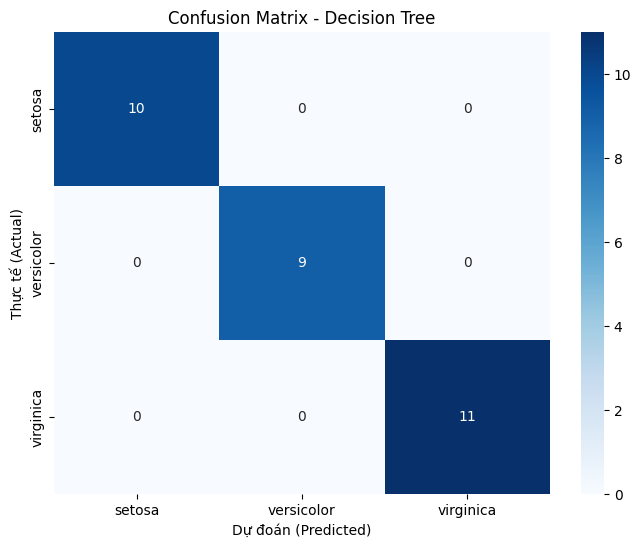

In [21]:
'''
e) Sử	dụng	Cây	quyết	định	để	phân	lớp	và	thực	hiện	các	yêu	cầu	sau:
- Huấn	luyện	mô	hình	phân	lớp	trên	tập	train
Hướng	dẫn:		sử	dụng	DecisionTreeClassifier của	thư	viện	sklearn
- Dự	đoán	nhãn	lớp	cho	tập	test
Hướng	dẫn:	sử	dụng	predict
- Tính	và	in	ra	Accuracy	của	mô	hình	trên	tập	test
Hướng	dẫn:	sử	dụng	accuracy_score	từ	thư	viện	sklearn	để	tính	accuracy	giữa	y
dự	đoán	từ	mô	hình	và	y_test
- Tính	và	in	ra	Precision,	Recall,	F1-score	của	từng	lớp	và	trung	bình	của	mô	hình
trên	tập	test
Hướng	dẫn: sử	dụng	classification_report	từ	thư	viện	sklearn	để	tính	các	độ	đo
trên	giữa	y	dự	đoán	từ	mô	hình	và	y_test
- Hiển	thị	confusion	matrix	bằng	heat	map	(bản	đồ	nhiệt)
Hướng	dẫn:	sử	dụng	confusion_matrix	từ	thư	viện	sklearn	để	tính	các	độ	đo	trên
giữa	y	dự	đoán	từ	mô	hình	và	y_test.	Sử	dụng	heatmap	của	seaborn	và	matplotlib
để	vẽ	bản	đồ.
'''
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Độ chính xác (Accuracy) trên tập test: {acc:.4f} ({acc*100:.2f}%)")
print("-" * 50)

print("Báo cáo phân loại (Classification Report):\n")
# target_names
print(classification_report(y_test, y_pred, target_names=iris_dataset.target_names))
print("-" * 50)

print("Ma trận nhầm lẫn (Confusion Matrix Heatmap):")

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris_dataset.target_names,
            yticklabels=iris_dataset.target_names)
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Độ chính xác (Accuracy) - Naive Bayes: 1.0000 (100.00%)
--------------------------------------------------
Báo cáo phân loại (Classification Report) - Naive Bayes:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
Ma trận nhầm lẫn (Confusion Matrix Heatmap):


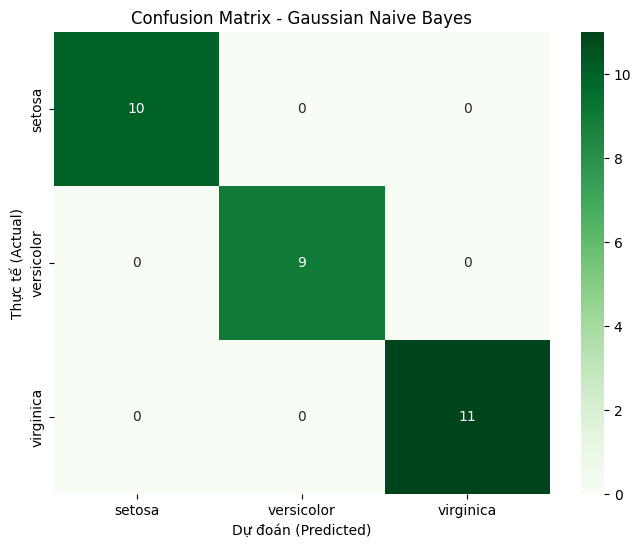

In [23]:
'''
f) Sử	dụng	Naïve	Bayes	để	phân	lớp	và	thực	hiện	các	yêu	cầu	như	câu	e.
Hướng	dẫn:	sử	dụng	GaussianNB	của	thư	viện	sklearn
'''
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

y_pred_gnb = gnb_model.predict(X_test)

#  Tính và in Accuracy
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Độ chính xác (Accuracy) - Naive Bayes: {acc_gnb:.4f} ({acc_gnb*100:.2f}%)")
print("-" * 50)

#  Tính và in Precision, Recall, F1-score
print("Báo cáo phân loại (Classification Report) - Naive Bayes:\n")
print(classification_report(y_test, y_pred_gnb, target_names=iris_dataset.target_names))
print("-" * 50)

#  Hiển thị Confusion Matrix bằng Heatmap
print("Ma trận nhầm lẫn (Confusion Matrix Heatmap):")
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

plt.figure(figsize=(8, 6))

sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris_dataset.target_names,
            yticklabels=iris_dataset.target_names)
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()


Độ chính xác (Accuracy) - KNN (k=5): 1.0000 (100.00%)
--------------------------------------------------
Báo cáo phân loại (Classification Report) - KNN:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
Ma trận nhầm lẫn (Confusion Matrix Heatmap):


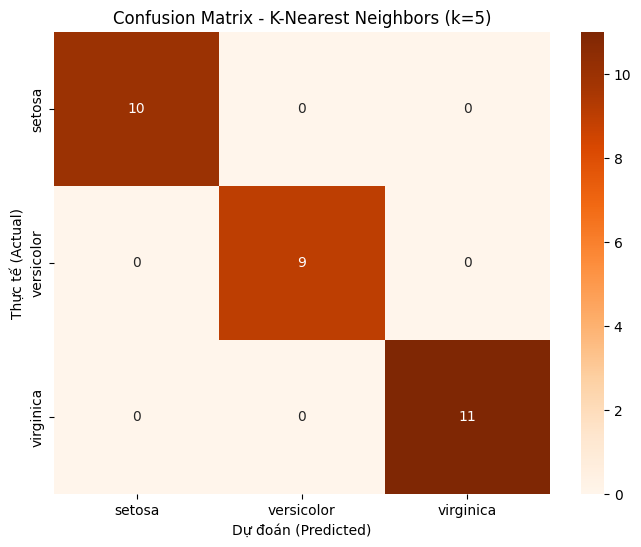

In [25]:
'''
g) Sử	dụng	K Nearest Neighbors	Classizier để	phân	lớp	và	thực	hiện	các	yêu
cầu	như	câu	e.
Hướng	dẫn:	sử	dụng	KNeighborsClassigier của	thư	viện	sklearn
'''
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

# Tính và in Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Độ chính xác (Accuracy) - KNN (k=5): {acc_knn:.4f} ({acc_knn*100:.2f}%)")
print("-" * 50)

# Tính và in Precision, Recall, F1-score
print("Báo cáo phân loại (Classification Report) - KNN:\n")
print(classification_report(y_test, y_pred_knn, target_names=iris_dataset.target_names))
print("-" * 50)

# Hiển thị Confusion Matrix bằng Heatmap
print("Ma trận nhầm lẫn (Confusion Matrix Heatmap):")
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges',
            xticklabels=iris_dataset.target_names,
            yticklabels=iris_dataset.target_names)
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Confusion Matrix - K-Nearest Neighbors (k=5)')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Bắt đầu huấn luyện...
Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3130 - loss: 1.1161
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5161 - loss: 0.9404
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6926 - loss: 0.8177
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6784 - loss: 0.7102
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.5871
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9267 - loss: 0.5010
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6745 - loss: 0.5350
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7921 - loss: 0.4609
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9301 - loss: 0.4173
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9321 - loss: 0.3341
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9057 - loss: 0.3879
Epoch 12/100
120/12

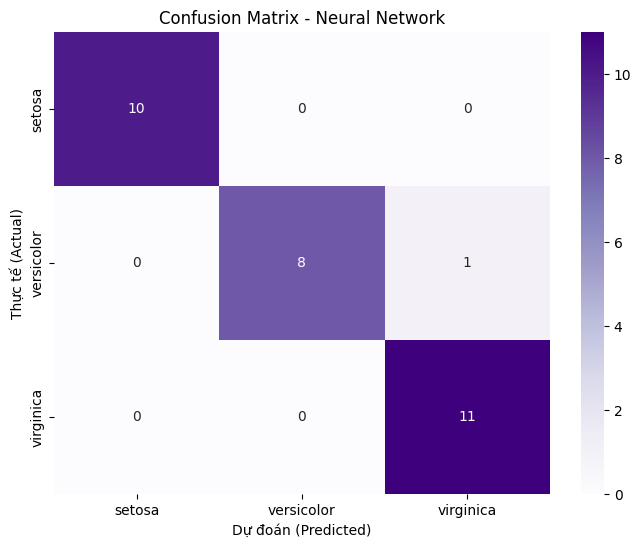

In [30]:
'''
h) Sử	dụng	Neural	Network	để	phân	lớp	và	thực	hiện	các	yêu	cầu:
- Xây	dựng	Neural	Network	gồm	02	hidden layers và	01	output layer:
o 01	 hidden layer:	 Gồm	10 neuron,	 sử	 dụng	 hàm	 kích	 hoạt	Relu	và	 các
neuron	được	kết	nối	đầy	đủ	(Fully	connected),	với	input_shape	là	shape
của	tập	X_train (4	thuộc	tính).
o 01	 hidden	layer:	 Gồm	20 neuron,	 sử	 dụng	 hàm	 kích	 hoạt	Relu	 và	 các
neuron	 được	 kết	 nối	 đầy	 đủ	 với	 các	 neuron	 ở	 lớp	 trước	 đó (Fully
connected)
o Output layer:	Gồm	số	lượng	neuron	là	số	class	cần	phân	lớp,	sử	dụng
hàm	 kích	 hoạt	Softmax	 để	 tính	xác	 suất	 của	 từng	 class	 và	 các	neuron
được	kết	nối	đầy	đủ	(Fully	connected).
Hướng	 dẫn:	 Sử	 dụng	 Sequential	 và	 Dense	 từ	 thư	 viện	 Keras	 với TensorFlow
backend.
Sequential	là	một	loại	mô	hình	mạng	phổ	biến	trong	Keras,	cho	phép	xây	dựng
một	chuỗi	tuần	tự	các	layer mạng	nơ-ron.
Dense:	là	một	fully	connected	layer	trong	mạng.	Các	đơn	vị	trong	layer này	kết
nối	tất	cả	các	đơn	vị	từ	layer trước	đó	đến	tất	cả	các	đơn	vị	của	layer hiện	tại.
- Biên	dịch	mô	hình	với	 tối	ưu	hóa	adam	để	điều	chỉnh	các	 trọng	số;	sử	dụng
sparse_categorical_crossentropy	loss để	đo	lường	sự	khác	biệt	giữa	dự	đoán	và
nhãn	thực	tế	trong	quá	trình	train;	sử	dụng	accuracy	để	đánh	giá	hiệu	suất	của
mô	hình	sau	mỗi	lần	lặp	huấn	luyện.
Hướng	dẫn:	Sử	dụng	compile
- Huấn	luyện	mô	hình	dựa	trên	tập	train	(X_train,	y_train)	với	số	vòng	lặp	(epoch)
là	100;	số	lượng	mẫu	dữ	liệu	được	sử	dụng	 trong	mỗi	lần	cập	nhật	 trọng	số
(batch_size)	 là	 1.	 Hiển	 thị	 thông	 tin	 tiến	 trình	 huấn	 luyện	 sau	 mỗi	 epoch
(verbose	=	1)
Hướng	dẫn:	Sử	dụng	fit
- Dự	đoán	nhãn	lớp	cho	tập	test
Hướng	dẫn:	sử	dụng	predict	để	dự	đoán	xác	suất	cho	mỗi	mẫu	và	mỗi	class.	Sử
dụng	argmax	của	thư	viện	numpy	để	chọn	ra	class	có	xác	suất	lớn	nhất	của	từng
mẫu	dữ	liệu.
- Tính	và	in	ra	Accuracy	của	mô	hình	trên	tập	test
- Tính	và	in	ra	Precision,	Recall,	F1-score	của	từng	lớp	và	trung	bình	của	mô	hình
trên	tập	test
- Hiển	thị	confusion	matrix	bằng	heat	map	(bản	đồ	nhiệt)
Hướng	dẫn:	Thực	hiện	tương	tư	như	câu	e
'''
model = Sequential()

# Hidden layer 1: 10 neurons, Relu, input_shape=4 (số đặc trưng)
model.add(Dense(10, activation='relu', input_shape=(4,)))

# Hidden layer 2: 20 neurons, Relu
model.add(Dense(20, activation='relu'))

# Output layer: 3 neurons (3 lớp hoa), Softmax (để tính xác suất)
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Bắt đầu huấn luyện...")
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

# Dự đoán (Predict)

y_pred_probs = model.predict(X_test)

# Dùng argmax để lấy vị trí có xác suất cao nhất (biến đổi về nhãn 0, 1, 2)
y_pred_nn = np.argmax(y_pred_probs, axis=1)


# Đánh giá kết quả (Evaluation)

# Tính Accuracy
acc_nn = accuracy_score(y_test, y_pred_nn)
print("-" * 50)
print(f"Độ chính xác (Accuracy) - Neural Network: {acc_nn:.4f} ({acc_nn*100:.2f}%)")
print("-" * 50)

# Báo cáo phân loại
print("Báo cáo phân loại (Classification Report) - Neural Network:\n")
print(classification_report(y_test, y_pred_nn, target_names=iris_dataset.target_names))
print("-" * 50)

# Vẽ Confusion Matrix
print("Ma trận nhầm lẫn (Confusion Matrix Heatmap):")
cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(8, 6))

sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples',
            xticklabels=iris_dataset.target_names,
            yticklabels=iris_dataset.target_names)
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Confusion Matrix - Neural Network')
plt.show()

In [32]:
'''
i) Sử	dụng	các	mô	hình	phân	lớp	đã	huấn	luyện	ở	trên	(câu	e,	f,	g,h)	cho	03
mẫu	dữ	liệu	mới	sau:
[6.2,	2.9,	4.3,	1.3]
[5.1,	3.5,	1.4,	0.2]
[7.3,	2.8,	6.4,	2.1]
Hướng	dẫn: Đưa	3	mẫu	dữ	liệu	trên	vào	array.	Sử	dụng	predict	để	dự	đoán	từ
các	mô	hình	phân	lớp	đã	huấn	luyện	ở	các	câu	trên.	In	ra	nhãn	lớp	dự	đoán.
'''
new_samples = np.array([
    [6.2, 2.9, 4.3, 1.3],
    [5.1, 3.5, 1.4, 0.2],
    [7.3, 2.8, 6.4, 2.1]
])

try:
    max_values
except NameError:
    max_values = iris_dataset.data.max(axis=0)

# Thực hiện chuẩn hóa
new_samples_norm = new_samples / max_values

print("Dữ liệu mới sau khi chuẩn hóa (về đoạn 0-1):")
print(new_samples_norm)
print("=" * 60)

def print_result(model_name, preds):
    names = iris_dataset.target_names[preds]
    print(f" Mô hình {model_name} dự đoán:")
    print(f"   Mẫu 1: {names[0]}")
    print(f"   Mẫu 2: {names[1]}")
    print(f"   Mẫu 3: {names[2]}")
    print("-" * 40)


# 1. Decision Tree
pred_dt = dt_model.predict(new_samples_norm)
print_result("Decision Tree (Cây quyết định)", pred_dt)

# 2. Naive Bayes
pred_gnb = gnb_model.predict(new_samples_norm)
print_result("Naive Bayes", pred_gnb)

# 3. KNN
pred_knn = knn_model.predict(new_samples_norm)
print_result("KNN (k=5)", pred_knn)

# 4. Neural Network
# NN trả về xác suất, ta dùng argmax để lấy vị trí có xác suất cao nhất
pred_nn_prob = model.predict(new_samples_norm)
pred_nn = np.argmax(pred_nn_prob, axis=1)
print_result("Neural Network", pred_nn)

Dữ liệu mới sau khi chuẩn hóa (về đoạn 0-1):
[[0.78481013 0.65909091 0.62318841 0.52      ]
 [0.64556962 0.79545455 0.20289855 0.08      ]
 [0.92405063 0.63636364 0.92753623 0.84      ]]
 Mô hình Decision Tree (Cây quyết định) dự đoán:
   Mẫu 1: versicolor
   Mẫu 2: setosa
   Mẫu 3: virginica
----------------------------------------
 Mô hình Naive Bayes dự đoán:
   Mẫu 1: versicolor
   Mẫu 2: setosa
   Mẫu 3: virginica
----------------------------------------
 Mô hình KNN (k=5) dự đoán:
   Mẫu 1: versicolor
   Mẫu 2: setosa
   Mẫu 3: virginica
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
 Mô hình Neural Network dự đoán:
   Mẫu 1: versicolor
   Mẫu 2: setosa
   Mẫu 3: virginica
----------------------------------------


#j) Nhận	xét,	đánh	giá	hiệu	suất	của	các	mô	hình	đã	huấn	luyện
Kết quả: Hầu hết các mô hình (Decision Tree, Naïve Bayes, KNN, Neural Network) đều cho độ chính xác rất cao (thường từ 93% đến 100%).

Lý do: Bộ dữ liệu Iris có kích thước nhỏ (150 mẫu), ít nhiễu và các đặc trưng (chiều dài/rộng cánh hoa) phân tách rất rõ ràng giữa các loài hoa, đặc biệt là loài Iris setosa tách biệt hẳn so với hai loài còn lại.

**Đánh giá:**

+ KNN & Naïve Bayes: Thường hoạt động rất tốt trên bộ dữ liệu này dù cấu trúc đơn giản. KNN hoạt động hiệu quả vì các loài hoa cùng loại thường mọc cụm gần nhau (khoảng cách Euclid gần nhau).

+ Decision Tree: Có ưu điểm là dễ giải thích (có thể vẽ ra cây để xem luật if-else). Tuy nhiên, đôi khi nó có thể thấp hơn KNN một chút nếu bộ test rơi vào vùng ranh giới cắt của cây.

+ Neural Network: Với cấu trúc 2 lớp ẩn (10 và 20 neurons), mô hình này là quá phức tạp ("dùng dao mổ trâu giết gà") cho bộ dữ liệu đơn giản như Iris. Tuy nó vẫn cho kết quả cao, nhưng thời gian huấn luyện lâu hơn và tốn tài nguyên hơn so với 3 thuật toán kia mà hiệu quả không chênh lệch nhiều.